
🔷 Model: Random Forest
✅ Accuracy: 0.922752808988764
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       0.99      0.98      0.98       436
           2       0.87      0.89      0.88       410
           3       0.89      0.86      0.88       425

    accuracy                           0.92      1424
   macro avg       0.93      0.93      0.93      1424
weighted avg       0.92      0.92      0.92      1424



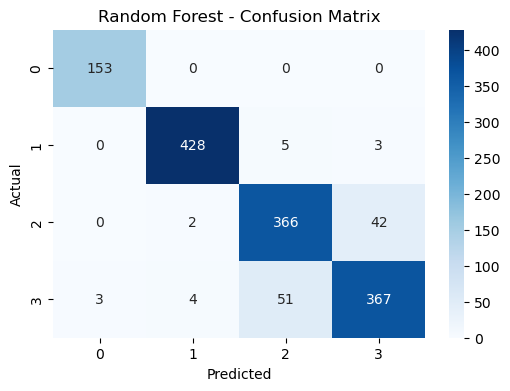


🔷 Model: Logistic Regression
✅ Accuracy: 0.8293539325842697
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       153
           1       0.94      0.92      0.93       436
           2       0.84      0.59      0.69       410
           3       0.71      0.91      0.80       425

    accuracy                           0.83      1424
   macro avg       0.85      0.85      0.84      1424
weighted avg       0.84      0.83      0.82      1424



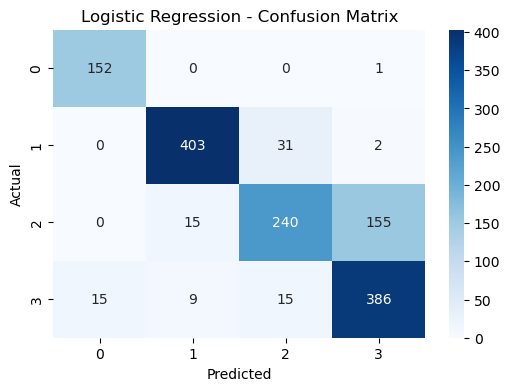


🔷 Model: SVM
✅ Accuracy: 0.860252808988764
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       153
           1       0.97      0.99      0.98       436
           2       0.98      0.60      0.74       410
           3       0.71      0.93      0.81       425

    accuracy                           0.86      1424
   macro avg       0.89      0.88      0.87      1424
weighted avg       0.89      0.86      0.85      1424



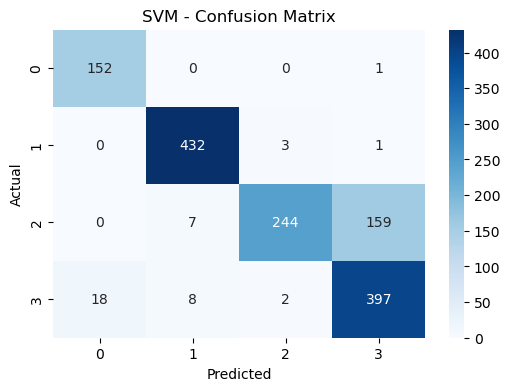


🔷 Model: Decision Tree
✅ Accuracy: 0.8827247191011236
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       153
           1       0.98      0.96      0.97       436
           2       0.80      0.85      0.82       410
           3       0.83      0.80      0.82       425

    accuracy                           0.88      1424
   macro avg       0.90      0.90      0.90      1424
weighted avg       0.88      0.88      0.88      1424



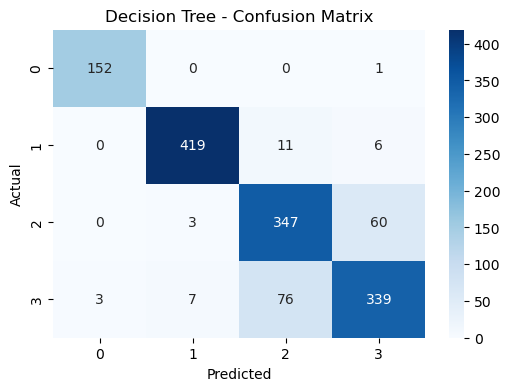


🔷 Model: KNN
✅ Accuracy: 0.8848314606741573
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       153
           1       0.97      1.00      0.98       436
           2       0.83      0.85      0.84       410
           3       0.85      0.77      0.81       425

    accuracy                           0.88      1424
   macro avg       0.88      0.90      0.89      1424
weighted avg       0.88      0.88      0.88      1424



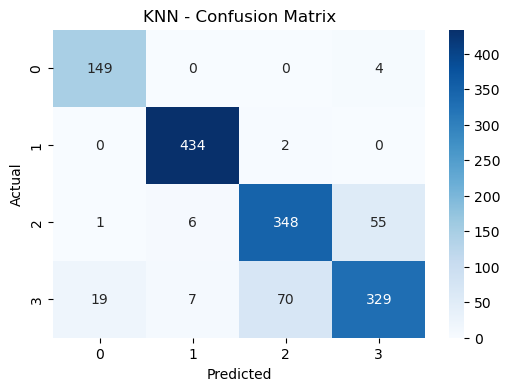


🔷 Model: Naive Bayes
✅ Accuracy: 0.7928370786516854
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.88      0.81      0.84       436
           2       0.84      0.57      0.68       410
           3       0.66      0.92      0.77       425

    accuracy                           0.79      1424
   macro avg       0.84      0.82      0.82      1424
weighted avg       0.82      0.79      0.79      1424



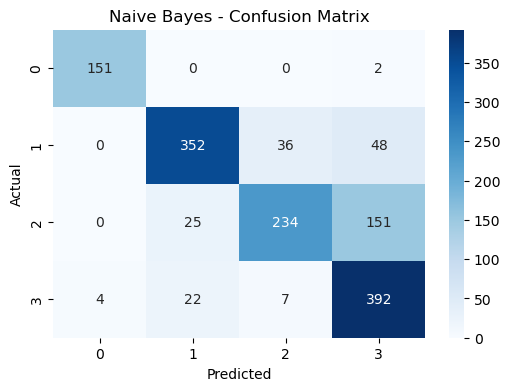


 Summary:
                 Model  Accuracy  Time Taken (s)
0        Random Forest  0.922753            1.69
4                  KNN  0.884831            0.51
3        Decision Tree  0.882725            0.60
2                  SVM  0.860253            0.78
1  Logistic Regression  0.829354            0.35
5          Naive Bayes  0.792837            0.33


In [7]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load CSV
df_all = pd.read_csv("cwru_features.csv")

# Drop non-numeric columns
X = df_all.drop(columns=["Label", "BearingType", "RPM"])
y = df_all["Label"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Store results
results = []

# Loop through each model
for name, model in models.items():
    print(f"\n🔷 Model: {name}")
    start = time.time()
    
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc}")
    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    end = time.time()
    results.append((name, acc, round(end-start, 2)))

# Summary
print("\n Summary:")
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Time Taken (s)"])
print(df_results.sort_values(by="Accuracy", ascending=False))
